# This notebook is for week 5 final assignments.

Table of Contents
    A full report consisting of all of the following components (15 marks):

    Introduction where you discuss the business problem and who would be interested in this project.
    Data where you describe the data that will be used to solve the problem and the source of the data.
    Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, and what machine learnings were used and why.
    Results section where you discuss the results.
    Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.
    Conclusion section where you conclude the report.

2. A link to your Notebook on your Github repository pushed showing your code. (15 marks)

3. Your choice of a presentation or blogpost. (10 marks)

In [1]:
# enviroment setup
import requests 
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

In [2]:
# UC system.csv file is manual uploaded for 9 undergrade education campus
# data frame for 9 UC undergrade campus
df_ucsystem = pd.read_csv('UC System.csv')

print(df_ucsystem.shape)    # 9 expected 

df_ucsystem.head(9)

(9, 4)


,Campus,Alias,Address,PostCode
0,UC Berkeley,UCB,"2227 Piedmont Avenue, Bereley, CA 94720",94720
1,UC Davis,UCD,"550 Alumni Lane, Davis, CA 95616",95616
2,UC Irvine,UCI,"Irvine, CA 92697",92697
3,UC LA,UCLA,"1147 Murphy Hall, Los Angeles, CA 90095",90095
4,UC Merced,UCM,"5200 N. Lake Road, Merced, CA 95343",95343
5,UC Riverside,UCR,"900 University Ave, Riverside, CA 92521",92521
6,UC San Diego,UCSD,"9500 Gilman Drive, La Jolla, CA 92093",92093
7,UC Santa Barbara,UCSB,"Santa Barbara, CA 93106",93106
8,UC Santa Cruz,UCSC,"1156 HIGH STREET, SANTA CRUZ, CA 95064",95064


In [3]:
# # housekeeping for display result
print('UC summary : \n There are {} unique Postcodes and {} university in DataFrame'.format(df_ucsystem.PostCode.unique().size,df_ucsystem.Alias.unique().size))


UC summary : 
 There are 9 unique Postcodes and 9 university in DataFrame


In [4]:
# add latitude & longitude
geolocator = Nominatim(user_agent="Capstone_julian")
 
def lat (postcode) :
    location = geolocator.geocode(postcode)
    return  location.latitude

def long (postcode) :
    location = geolocator.geocode(postcode)
    return  location.longitude

# df_ucsystem['latitude', 'latitude']   # geolocator.geocode(df_ucsystem['PostCode']).latitude
df_ucsystem['latitude'] = df_ucsystem['PostCode'].apply(lambda postcode: lat(postcode))
df_ucsystem['longitude'] = df_ucsystem['PostCode'].apply(lambda postcode: long(postcode))
 
print('The dataframe size', df_ucsystem.shape)
df_ucsystem.head()                                              

The dataframe size (9, 6)


,Campus,Alias,Address,PostCode,latitude,longitude
0,UC Berkeley,UCB,"2227 Piedmont Avenue, Bereley, CA 94720",94720,37.873064,-122.258322
1,UC Davis,UCD,"550 Alumni Lane, Davis, CA 95616",95616,38.547386,-121.738213
2,UC Irvine,UCI,"Irvine, CA 92697",92697,33.645953,-117.845700
3,UC LA,UCLA,"1147 Murphy Hall, Los Angeles, CA 90095",90095,34.067142,-118.444420
4,UC Merced,UCM,"5200 N. Lake Road, Merced, CA 95343",95343,18.554723,-72.311189


In [5]:
# save the work to csv file for backup
path = "UC_System.csv"
df_ucsystem.to_csv(path)

In [6]:
# create map of UC system using latitude and longitude values
neighborhoods = df_ucsystem.drop('PostCode',axis=1)
print(neighborhoods.shape)
neighborhoods.head()

(9, 5)


,Campus,Alias,Address,latitude,longitude
0,UC Berkeley,UCB,"2227 Piedmont Avenue, Bereley, CA 94720",37.873064,-122.258322
1,UC Davis,UCD,"550 Alumni Lane, Davis, CA 95616",38.547386,-121.738213
2,UC Irvine,UCI,"Irvine, CA 92697",33.645953,-117.845700
3,UC LA,UCLA,"1147 Murphy Hall, Los Angeles, CA 90095",34.067142,-118.444420
4,UC Merced,UCM,"5200 N. Lake Road, Merced, CA 95343",18.554723,-72.311189


In [7]:
 # map start from Bekeley
location = geolocator.geocode("94720") 
latitude = location.latitude
longitude = location.longitude
#print(location)
#print(location.address)
#print((location.latitude, location.longitude))

map_ucsystem= folium.Map(location=[latitude, longitude], zoom_start=5)

# add markers to map
for lat, lng, campus, alias in zip(neighborhoods['latitude'], neighborhoods['longitude'], neighborhoods['Campus'], neighborhoods['Alias']):
    label = '{}'.format(neighborhoods)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ucsystem)  
    
map_ucsystem

From the Foursquare lab in the previous module, we know that all the information is in the items key. Before we proceed, let's borrow the get_category_type function from the Foursquare lab.

Below for deep analysis

In [8]:
#CLIENT_ID = 'your-client-ID' # your Foursquare ID
#CLIENT_SECRET = 'your-client-secret' # your Foursquare Secret
CLIENT_ID = 'Q33MVZCY2B2RZVLZOX0CRBSIJPS5KHM14UO3B2OQ2HWVHTMK' # your Foursquare ID    
CLIENT_SECRET = 'FMFJ0LYY20QS3HOV0N342ICDEQDK2BAFWI3G524HLPKIXXKR' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

Your credentails:
CLIENT_ID: Q33MVZCY2B2RZVLZOX0CRBSIJPS5KHM14UO3B2OQ2HWVHTMK
CLIENT_SECRET:FMFJ0LYY20QS3HOV0N342ICDEQDK2BAFWI3G524HLPKIXXKR


In [9]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [10]:
# Now write the code to run the above function on each campus and create a new dataframe called ucsystem_venues

ucsystem_venues = df_ucsystem
ucsystem_venues = getNearbyVenues(names = ucsystem_venues['Campus'],
                                   latitudes  = ucsystem_venues['latitude'],
                                   longitudes = ucsystem_venues['longitude']
                                  )

UC Berkeley
UC Davis
UC Irvine
UC LA
UC Merced
UC Riverside
UC San Diego
UC Santa Barbara
UC Santa Cruz


In [11]:
ucsystem_data = neighborhoods 
ucsystem_data.head()

,Campus,Alias,Address,latitude,longitude
0,UC Berkeley,UCB,"2227 Piedmont Avenue, Bereley, CA 94720",37.873064,-122.258322
1,UC Davis,UCD,"550 Alumni Lane, Davis, CA 95616",38.547386,-121.738213
2,UC Irvine,UCI,"Irvine, CA 92697",33.645953,-117.845700
3,UC LA,UCLA,"1147 Murphy Hall, Los Angeles, CA 90095",34.067142,-118.444420
4,UC Merced,UCM,"5200 N. Lake Road, Merced, CA 95343",18.554723,-72.311189


In [12]:
# one hot encoding
ucsystem_onehot = pd.get_dummies(ucsystem_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ucsystem_onehot['Neighborhood'] = ucsystem_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [ucsystem_onehot.columns[-1]] + list(ucsystem_onehot.columns[:-1])
ucsystem_onehot = ucsystem_onehot[fixed_columns]

print(ucsystem_onehot.shape)
ucsystem_onehot.head(10)

# print(tornoto_venues.groupby('Neighborhood').count())
# print(tornoto_onehot.groupby('Neighborhood').count())

(180, 86)


,Neighborhood,American Restaurant,Amphitheater,Athletics & Sports,Bagel Shop,Bakery,Bar,Beer Bar,Beer Store,Big Box Store,Botanical Garden,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Stop,Café,Chinese Restaurant,Clothing Store,Coffee Shop,College Administrative Building,College Arts Building,College Auditorium,College Bookstore,College Cafeteria,College Gym,College Library,College Quad,College Theater,Comic Shop,Concert Hall,Convenience Store,Deli / Bodega,Fast Food Restaurant,Food & Drink Shop,Food Court,Food Truck,Fountain,Frozen Yogurt Shop,Garden,Gift Shop,Grocery Store,Gym,Hawaiian Restaurant,History Museum,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Theater,Irish Pub,Italian Restaurant,Juice Bar,Lake,Market,Medical Center,Mediterranean Restaurant,Mexican Restaurant,Museum,Nature Preserve,New American Restaurant,Noodle House,Paper / Office Supplies Store,Park,Pizza Place,Plaza,Pub,Public Art,Restaurant,Salad Place,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shipping Store,Sporting Goods Shop,Steakhouse,Student Center,Supermarket,Taco Place,Taiwanese Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Vegetarian / Vegan Restaurant,Wine Bar
0,UC Berkeley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,UC Berkeley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,UC Berkeley,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,UC Berkeley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,UC Berkeley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,UC Berkeley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,UC Berkeley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,UC Berkeley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,UC Berkeley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,UC Berkeley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
print('There are {} uniques categories.'.format(len(ucsystem_venues['Venue Category'].unique())))

There are 85 uniques categories.


Analyze Each Neighborhood

In [14]:
# Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each categor

ucsystem_grouped = ucsystem_onehot.groupby('Neighborhood').mean().reset_index()
print(ucsystem_grouped.shape)
ucsystem_grouped

(9, 86)


,Neighborhood,American Restaurant,Amphitheater,Athletics & Sports,Bagel Shop,Bakery,Bar,Beer Bar,Beer Store,Big Box Store,Botanical Garden,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Stop,Café,Chinese Restaurant,Clothing Store,Coffee Shop,College Administrative Building,College Arts Building,College Auditorium,College Bookstore,College Cafeteria,College Gym,College Library,College Quad,College Theater,Comic Shop,Concert Hall,Convenience Store,Deli / Bodega,Fast Food Restaurant,Food & Drink Shop,Food Court,Food Truck,Fountain,Frozen Yogurt Shop,Garden,Gift Shop,Grocery Store,Gym,Hawaiian Restaurant,History Museum,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Theater,Irish Pub,Italian Restaurant,Juice Bar,Lake,Market,Medical Center,Mediterranean Restaurant,Mexican Restaurant,Museum,Nature Preserve,New American Restaurant,Noodle House,Paper / Office Supplies Store,Park,Pizza Place,Plaza,Pub,Public Art,Restaurant,Salad Place,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shipping Store,Sporting Goods Shop,Steakhouse,Student Center,Supermarket,Taco Place,Taiwanese Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Vegetarian / Vegan Restaurant,Wine Bar
0,UC Berkeley,0.000000,0.025,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.025,0.025000,0.025000,0.00000,0.150000,0.000000,0.025,0.075000,0.00000,0.025,0.000000,0.00000,0.025000,0.000000,0.025000,0.025000,0.025000,0.000000,0.025,0.000,0.000000,0.000000,0.000000,0.000000,0.0000,0.00000,0.025,0.00000,0.025,0.000000,0.0250,0.000000,0.025,0.025,0.000000,0.000000,0.025000,0.025,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.025000,0.025000,0.02500,0.0000,0.025,0.00000,0.000000,0.000000,0.050000,0.000000,0.000000,0.0000,0.025000,0.00000,0.075000,0.0250,0.00000,0.00000,0.02500,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.025000,0.000,0.000000,0.0000,0.000000
1,UC Davis,0.054054,0.000,0.000000,0.000000,0.054054,0.054054,0.027027,0.027027,0.00000,0.000000,0.027027,0.000,0.000000,0.027027,0.00000,0.027027,0.000000,0.000,0.027027,0.00000,0.000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027027,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.0000,0.00000,0.000,0.00000,0.000,0.027027,0.0000,0.027027,0.000,0.000,0.000000,0.054054,0.081081,0.000,0.027027,0.027027,0.000000,0.000000,0.000000,0.00000,0.000000,0.054054,0.00000,0.0000,0.000,0.00000,0.000000,0.027027,0.108108,0.000000,0.000000,0.0000,0.027027,0.00000,0.054054,0.0000,0.00000,0.00000,0.00000,0.027027,0.0000,0.000000,0.00000,0.000000,0.027027,0.027027,0.000,0.027027,0.0000,0.027027
2,UC Irvine,0.066667,0.000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000,0.000000,0.066667,0.00000,0.000000,0.066667,0.000,0.200000,0.00000,0.000,0.066667,0.00000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000,0.000,0.000000,0.066667,0.000000,0.000000,0.0000,0.00000,0.000,0.00000,0.000,0.000000,0.0000,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.066667,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.0000,0.000,0.00000,0.000000,0.000000,0.000000,0.000000,0.066667,0.0000,0.000000,0.00000,0.133333,0.0000,0.00000,0.00000,0.00000,0.000000,0.0000,0.000000,0.00000,0.066667,0.000000,0.000000,0.000,0.000000,0.0000,0.000000
3,UC LA,0.062500,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.03125,0.000000,0.000000,0.000,0.000000,0.000000,0.03125,0.062500,0.031250,0.000,0.125000,0.03125,0.000,0.000000,0.03125,0.000000,0.000000,0.000000,0.000000,0.031250,0.000000,0.000,0.000,0.000000,0.093750,0.000000,0.000000,0.0000,0.03125,0.000,0.03125,0.000,0.000000,0.0000,0.000000,0.000,0.000,0.031250,0.000000,0.000000,0.000,0.000000,0.000000,0.031250,0.000000,0.000000,0.03125,0.000000,0.000000,0.03125,0.0000,0.000,0.03125,0.000000,0.000000,0.062500,0.031250,0.000000,0.0000,0.000000,0.03125,0.000000,0.0000,0.03125,0.03125,0.03125,0.000000,0.0000,0.000000,0.03125,0.000

Let's print each neighborhood along with the top 5 most common venues

In [15]:
num_top_venues = 5

for hood in ucsystem_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = ucsystem_grouped[ucsystem_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----UC Berkeley----
            venue  freq
0            Café  0.15
1  Sandwich Place  0.08
2     Coffee Shop  0.08
3     Pizza Place  0.05
4    College Quad  0.02


----UC Davis----
                 venue  freq
0          Pizza Place  0.11
1    Indian Restaurant  0.08
2  American Restaurant  0.05
3       Ice Cream Shop  0.05
4               Bakery  0.05


----UC Irvine----
                 venue  freq
0          Coffee Shop  0.20
1       Sandwich Place  0.13
2  American Restaurant  0.07
3           Taco Place  0.07
4                  Pub  0.07


----UC LA----
                  venue  freq
0           Coffee Shop  0.12
1  Fast Food Restaurant  0.09
2   American Restaurant  0.06
3                  Café  0.06
4           Pizza Place  0.06


----UC Merced----
                  venue  freq
0                 Plaza  0.33
1  Fast Food Restaurant  0.33
2                Market  0.33
3        Ice Cream Shop  0.00
4     Indian Restaurant  0.00


----UC Riverside----
             venue  freq
0  Co

Let's put that into a pandas dataframe

In [16]:
#First, let's write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [17]:
# Now let's create the new dataframe and display the top 10 venues for each neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = ucsystem_grouped['Neighborhood']

for ind in np.arange(ucsystem_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ucsystem_grouped.iloc[ind, :], num_top_venues)

 
print(neighborhoods_venues_sorted.shape)
neighborhoods_venues_sorted.head(9)

(9, 11)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,UC Berkeley,Café,Coffee Shop,Sandwich Place,Pizza Place,College Library,Hot Dog Joint,College Quad,Clothing Store,New American Restaurant,Burger Joint
1,UC Davis,Pizza Place,Indian Restaurant,American Restaurant,Bakery,Bar,Mexican Restaurant,Sandwich Place,Ice Cream Shop,Grocery Store,Italian Restaurant
2,UC Irvine,Coffee Shop,Sandwich Place,Fast Food Restaurant,Juice Bar,College Quad,College Auditorium,Chinese Restaurant,Pub,Burrito Place,American Restaurant
3,UC LA,Coffee Shop,Fast Food Restaurant,American Restaurant,Café,Pizza Place,Plaza,Garden,College Theater,Hotel,College Bookstore
4,UC Merced,Market,Plaza,Fast Food Restaurant,Wine Bar,College Bookstore,College Cafeteria,College Gym,College Library,College Quad,College Theater
5,UC Riverside,Park,Burger Joint,Coffee Shop,Pizza Place,Food & Drink Shop,Chinese Restaurant,Student Center,Deli / Bodega,Café,College Library
6,UC San Diego,Theater,Convenience Store,Food Truck,Steakhouse,Nature Preserve,Park,College Cafeteria,Public Art,Restaurant,Scenic Lookout
7,UC Santa Barbara,Burger Joint,Sandwich Place,American Restaurant,Restaurant,Food Court,Hotel,College Theater,Juice Bar,Lake,College Cafeteria
8,UC Santa Cruz,Botanical Garden,College Gym,Athletics & Sports,Mexican Restaurant,Taco Place,Café,Fast Food Restaurant,Convenience Store,College Library,College Quad


#Cluster Neighborhoods

# Conclusion: The most favoriate venue around the campus are cafe shop or pize store. But UCSC looks very artist which Theater and convenient store is most popular.
# For Chinese student, UCLA looks very good for their diet

In [26]:
# set number of clusters
kclusters = 3

ucsystem_grouped_clustering = ucsystem_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ucsystem_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 2, 0, 0, 0, 1], dtype=int32)

In [27]:
# Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

print(ucsystem_data.shape)  # 9, 5
ucsystem_data.head(20)

print(neighborhoods_venues_sorted.shape)
neighborhoods_venues_sorted.head(9)

(9, 5)
(9, 11)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,UC Berkeley,Café,Coffee Shop,Sandwich Place,Pizza Place,College Library,Hot Dog Joint,College Quad,Clothing Store,New American Restaurant,Burger Joint
1,UC Davis,Pizza Place,Indian Restaurant,American Restaurant,Bakery,Bar,Mexican Restaurant,Sandwich Place,Ice Cream Shop,Grocery Store,Italian Restaurant
2,UC Irvine,Coffee Shop,Sandwich Place,Fast Food Restaurant,Juice Bar,College Quad,College Auditorium,Chinese Restaurant,Pub,Burrito Place,American Restaurant
3,UC LA,Coffee Shop,Fast Food Restaurant,American Restaurant,Café,Pizza Place,Plaza,Garden,College Theater,Hotel,College Bookstore
4,UC Merced,Market,Plaza,Fast Food Restaurant,Wine Bar,College Bookstore,College Cafeteria,College Gym,College Library,College Quad,College Theater
5,UC Riverside,Park,Burger Joint,Coffee Shop,Pizza Place,Food & Drink Shop,Chinese Restaurant,Student Center,Deli / Bodega,Café,College Library
6,UC San Diego,Theater,Convenience Store,Food Truck,Steakhouse,Nature Preserve,Park,College Cafeteria,Public Art,Restaurant,Scenic Lookout
7,UC Santa Barbara,Burger Joint,Sandwich Place,American Restaurant,Restaurant,Food Court,Hotel,College Theater,Juice Bar,Lake,College Cafeteria
8,UC Santa Cruz,Botanical Garden,College Gym,Athletics & Sports,Mexican Restaurant,Taco Place,Café,Fast Food Restaurant,Convenience Store,College Library,College Quad


In [35]:
# add clustering labels
print( neighborhoods_venues_sorted.shape)
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_) # only once to avoide duplicated
neighborhoods_venues_sorted.head(9)

(9, 11)


,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,UC Berkeley,Café,Coffee Shop,Sandwich Place,Pizza Place,College Library,Hot Dog Joint,College Quad,Clothing Store,New American Restaurant,Burger Joint
1,0,UC Davis,Pizza Place,Indian Restaurant,American Restaurant,Bakery,Bar,Mexican Restaurant,Sandwich Place,Ice Cream Shop,Grocery Store,Italian Restaurant
2,0,UC Irvine,Coffee Shop,Sandwich Place,Fast Food Restaurant,Juice Bar,College Quad,College Auditorium,Chinese Restaurant,Pub,Burrito Place,American Restaurant
3,0,UC LA,Coffee Shop,Fast Food Restaurant,American Restaurant,Café,Pizza Place,Plaza,Garden,College Theater,Hotel,College Bookstore
4,2,UC Merced,Market,Plaza,Fast Food Restaurant,Wine Bar,College Bookstore,College Cafeteria,College Gym,College Library,College Quad,College Theater
5,0,UC Riverside,Park,Burger Joint,Coffee Shop,Pizza Place,Food & Drink Shop,Chinese Restaurant,Student Center,Deli / Bodega,Café,College Library
6,0,UC San Diego,Theater,Convenience Store,Food Truck,Steakhouse,Nature Preserve,Park,College Cafeteria,Public Art,Restaurant,Scenic Lookout
7,0,UC Santa Barbara,Burger Joint,Sandwich Place,American Restaurant,Restaurant,Food Court,Hotel,College Theater,Juice Bar,Lake,College Cafeteria
8,1,UC Santa Cruz,Botanical Garden,College Gym,Athletics & Sports,Mexican Restaurant,Taco Place,Café,Fast Food Restaurant,Convenience Store,College Library,College Quad


In [36]:
ucsystem_datamerged = ucsystem_data
ucsystem_datamerged.rename(columns={'Campus':'Neighborhood'}, inplace = True)
ucsystem_datamerged.head(9)

,Neighborhood,Alias,Address,latitude,longitude
0,UC Berkeley,UCB,"2227 Piedmont Avenue, Bereley, CA 94720",37.873064,-122.258322
1,UC Davis,UCD,"550 Alumni Lane, Davis, CA 95616",38.547386,-121.738213
2,UC Irvine,UCI,"Irvine, CA 92697",33.645953,-117.845700
3,UC LA,UCLA,"1147 Murphy Hall, Los Angeles, CA 90095",34.067142,-118.444420
4,UC Merced,UCM,"5200 N. Lake Road, Merced, CA 95343",18.554723,-72.311189
5,UC Riverside,UCR,"900 University Ave, Riverside, CA 92521",33.973821,-117.326654
6,UC San Diego,UCSD,"9500 Gilman Drive, La Jolla, CA 92093",32.874999,-117.244057
7,UC Santa Barbara,UCSB,"Santa Barbara, CA 93106",34.413729,-119.847407
8,UC Santa Cruz,UCSC,"1156 HIGH STREET, SANTA CRUZ, CA 95064",36.996217,-122.054483


In [37]:
# print(ucsystem_data_merged.shape)
# merge ucsystem_data_grouped with ucsystem_data 
ucsystem_datamerged = ucsystem_datamerged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

ucsystem_datamerged.head(9) # check the last columns!

,Neighborhood,Alias,Address,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,UC Berkeley,UCB,"2227 Piedmont Avenue, Bereley, CA 94720",37.873064,-122.258322,0,Café,Coffee Shop,Sandwich Place,Pizza Place,College Library,Hot Dog Joint,College Quad,Clothing Store,New American Restaurant,Burger Joint
1,UC Davis,UCD,"550 Alumni Lane, Davis, CA 95616",38.547386,-121.738213,0,Pizza Place,Indian Restaurant,American Restaurant,Bakery,Bar,Mexican Restaurant,Sandwich Place,Ice Cream Shop,Grocery Store,Italian Restaurant
2,UC Irvine,UCI,"Irvine, CA 92697",33.645953,-117.845700,0,Coffee Shop,Sandwich Place,Fast Food Restaurant,Juice Bar,College Quad,College Auditorium,Chinese Restaurant,Pub,Burrito Place,American Restaurant
3,UC LA,UCLA,"1147 Murphy Hall, Los Angeles, CA 90095",34.067142,-118.444420,0,Coffee Shop,Fast Food Restaurant,American Restaurant,Café,Pizza Place,Plaza,Garden,College Theater,Hotel,College Bookstore
4,UC Merced,UCM,"5200 N. Lake Road, Merced, CA 95343",18.554723,-72.311189,2,Market,Plaza,Fast Food Restaurant,Wine Bar,College Bookstore,College Cafeteria,College Gym,College Library,College Quad,College Theater
5,UC Riverside,UCR,"900 University Ave, Riverside, CA 92521",33.973821,-117.326654,0,Park,Burger Joint,Coffee Shop,Pizza Place,Food & Drink Shop,Chinese Restaurant,Student Center,Deli / Bodega,Café,College Library
6,UC San Diego,UCSD,"9500 Gilman Drive, La Jolla, CA 92093",32.874999,-117.244057,0,Theater,Convenience Store,Food Truck,Steakhouse,Nature Preserve,Park,College Cafeteria,Public Art,Restaurant,Scenic Lookout
7,UC Santa Barbara,UCSB,"Santa Barbara, CA 93106",34.413729,-119.847407,0,Burger Joint,Sandwich Place,American Restaurant,Restaurant,Food Court,Hotel,College Theater,Juice Bar,Lake,College Cafeteria
8,UC Santa Cruz,UCSC,"1156 HIGH STREET, SANTA CRUZ, CA 95064",36.996217,-122.054483,1,Botanical Garden,College Gym,Athletics & Sports,Mexican Restaurant,Taco Place,Café,Fast Food Restaurant,Convenience Store,College Library,College Quad


In [38]:
#  let's visualize the resulting clusters

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
#for lat, lon, poi, cluster in zip(ucsystem_datamerged['latitude'], ucsystem_datamerged['longitude'], ucsystem_datamerged['Neighborhood'], ucsystem_datamerged['Cluster Labels']):
for lat, lon, poi, cluster in zip(ucsystem_datamerged['latitude'], ucsystem_datamerged['longitude'], ucsystem_datamerged['Neighborhood'], ucsystem_datamerged['Cluster Labels']):
# for lat, lon, poi, cluster in zip(tornoto_merged['Latitude'], tornoto_merged['Longitude']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [39]:
# cluster 1

ucsystem_datamerged.loc[ucsystem_datamerged['Cluster Labels'] == 0, ucsystem_datamerged.columns[[1] + list(range(5, ucsystem_datamerged.shape[1]))]]

,Alias,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,UCB,0,Café,Coffee Shop,Sandwich Place,Pizza Place,College Library,Hot Dog Joint,College Quad,Clothing Store,New American Restaurant,Burger Joint
1,UCD,0,Pizza Place,Indian Restaurant,American Restaurant,Bakery,Bar,Mexican Restaurant,Sandwich Place,Ice Cream Shop,Grocery Store,Italian Restaurant
2,UCI,0,Coffee Shop,Sandwich Place,Fast Food Restaurant,Juice Bar,College Quad,College Auditorium,Chinese Restaurant,Pub,Burrito Place,American Restaurant
3,UCLA,0,Coffee Shop,Fast Food Restaurant,American Restaurant,Café,Pizza Place,Plaza,Garden,College Theater,Hotel,College Bookstore
5,UCR,0,Park,Burger Joint,Coffee Shop,Pizza Place,Food & Drink Shop,Chinese Restaurant,Student Center,Deli / Bodega,Café,College Library
6,UCSD,0,Theater,Convenience Store,Food Truck,Steakhouse,Nature Preserve,Park,College Cafeteria,Public Art,Restaurant,Scenic Lookout
7,UCSB,0,Burger Joint,Sandwich Place,American Restaurant,Restaurant,Food Court,Hotel,College Theater,Juice Bar,Lake,College Cafeteria


In [40]:
#Cluster 2
ucsystem_datamerged.loc[ucsystem_datamerged['Cluster Labels'] == 1, ucsystem_datamerged.columns[[1] + list(range(5, ucsystem_datamerged.shape[1]))]]

,Alias,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,UCSC,1,Botanical Garden,College Gym,Athletics & Sports,Mexican Restaurant,Taco Place,Café,Fast Food Restaurant,Convenience Store,College Library,College Quad


In [41]:
#Cluster 3
ucsystem_datamerged.loc[ucsystem_datamerged['Cluster Labels'] == 2, ucsystem_datamerged.columns[[1] + list(range(5, ucsystem_datamerged.shape[1]))]]

,Alias,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,UCM,2,Market,Plaza,Fast Food Restaurant,Wine Bar,College Bookstore,College Cafeteria,College Gym,College Library,College Quad,College Theater


Below Contents if to check the safety condition for 9 campuses
# data collection

In [42]:
!wget -q -O 'California_crime_data.csv' https://data.chhs.ca.gov/dataset/99bc1fea-c55c-4377-bad8-f00832fd195d/resource/bc09f211-200c-4c4c-aa13-d2e89c0d5577/download/hci_crime_752_pl_co_re_ca_2000-2013_21oct15.csv
print('Data downloaded!')

Data downloaded!


In [43]:
df_califonia_crime = pd.read_csv('California_crime_data.csv', encoding="cp1252")

# removing null values to avoid errors  
# df_califonia_crime.dropna(inplace = True)  
print(df_califonia_crime.shape)
df_califonia_crime.describe()
#df_califonia_crime.dtypes

/home/jupyterlab/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(49227, 27)


,reportyear,race_eth_code,geotypevalue,county_fips,region_code,strata_name_code,strata_level_name_code,numerator,denominator,rate,ll_95ci,ul_95ci,se,rse,ca_decile,ca_rr,dof_population
count,49226.000000,49226.0,49226.000000,48176.000000,49156.000000,49226.0,49226.000000,32293.000000,3.709000e+04,7323.000000,7323.000000,7323.000000,7323.000000,7323.000000,6301.000000,7323.000000,3.866000e+04
mean,2006.677711,9.0,39054.299923,6056.460561,8.396778,1.0,3.619551,618.156133,2.617145e+05,5.441245,4.300735,6.595281,0.588794,13.862678,5.501349,1.064389,2.514599e+05
std,4.070900,0.0,26562.720267,29.845061,4.951046,0.0,1.749811,5805.419986,1.862013e+06,25.442077,19.025128,31.936615,3.373453,15.080420,2.868860,4.755626,1.820102e+06
min,2000.000000,9.0,1.000000,6001.000000,1.000000,1.0,1.000000,1.000000,9.000000e+01,0.024739,0.000000,0.059025,0.010168,0.216762,1.000000,0.004288,0.000000e+00
25%,2003.000000,9.0,13588.000000,6037.000000,4.000000,1.0,2.000000,6.000000,1.306600e+04,2.040464,1.371024,2.635719,0.180475,5.407381,3.000000,0.400511,1.186400e+04
50%,2007.000000,9.0,39304.000000,6059.000000,10.000000,1.0,4.000000,32.000000,3.624850e+04,3.512293,2.789873,4.194440,0.283291,9.245003,6.000000,0.689796,3.449700e+04
75%,2010.000000,9.0,60242.000000,6081.000000,14.000000,1.0,5.000000,131.000000,8.618700e+04,5.412932,4.632967,6.276140,0.479669,16.222142,8.000000,1.065014,8.383200e+04
max,2013.000000,9.0,87090.000000,6115.000000,14.000000,1.0,6.000000,212831.000000,3.829036e+07,795.698925,614.402607,976.995242,92.498121,100.000000,10.000000,128.906972,3.819386e+07


In [44]:
pd.options.display.float_format = '{:.0f}'.format
df_califonia_crime.head()

,ind_id,ind_definition,reportyear,race_eth_code,race_eth_name,geotype,geotypevalue,geoname,county_fips,county_name,region_code,region_name,strata_name_code,strata_name,strata_level_name_code,strata_level_name,numerator,denominator,rate,ll_95ci,ul_95ci,se,rse,ca_decile,ca_rr,dof_population,version
0,752,"Number of Violent Crimes per 1,000 Population",2000,9,Total,CA,6,California,nan,NaN,nan,NaN,1,Type of violent crime,1,Aggravated assault,138325,33847694,nan,nan,nan,nan,nan,nan,nan,33873086,10/21/2015
1,752,"Number of Violent Crimes per 1,000 Population",2000,9,Total,CA,6,California,nan,NaN,nan,NaN,1,Type of violent crime,2,Forcible rape,9784,33847694,nan,nan,nan,nan,nan,nan,nan,33873086,10/21/2015
2,752,"Number of Violent Crimes per 1,000 Population",2000,9,Total,CA,6,California,nan,NaN,nan,NaN,1,Type of violent crime,3,Murder and non-negligent manslaughter,2079,33847694,nan,nan,nan,nan,nan,nan,nan,33873086,10/21/2015
3,752,"Number of Violent Crimes per 1,000 Population",2000,9,Total,CA,6,California,nan,NaN,nan,NaN,1,Type of violent crime,4,Robbery,60237,33847694,nan,nan,nan,nan,nan,nan,nan,33873086,10/21/2015
4,752,"Number of Violent Crimes per 1,000 Population",2000,9,Total,CA,6,California,nan,NaN,nan,NaN,1,Type of violent crime,5,Violent crime total,210448,33847694,6,6,6,0,0,nan,1,33873086,10/21/2015


In [45]:
# remove the record before 2010 and not in the 9 country
df_ucsystem_crime = df_califonia_crime
# pd.options.mode.chained_assignment = None 
cols = ['reportyear', 'race_eth_code', 'strata_name_code','strata_level_name_code','race_eth_code','geotypevalue']
county_list = ['Los Angeles','Merced','Orange','Riverside','San Diego','Santa Barbara','Santa Cruz','Yolo','Alameda']
#year_list = [2010,2011,2012,2013]
#df_ucsystem_crime = df_ucsystem_crime[~((df_ucsystem_crime['county_name'].isin(county_list)))]
# df_ucsystem_crime_short = df_ucsystem_crime[(df_ucsystem_crime['reportyear'].isin(year_list) & (df_ucsystem_crime['county_name'].isin(county_list)))]
df_ucsystem_crime_short = df_ucsystem_crime[df_ucsystem_crime['county_name'].isin(county_list)]

print(df_ucsystem_crime_short.shape)
df_ucsystem_crime_short.head()

(17242, 27)


,ind_id,ind_definition,reportyear,race_eth_code,race_eth_name,geotype,geotypevalue,geoname,county_fips,county_name,region_code,region_name,strata_name_code,strata_name,strata_level_name_code,strata_level_name,numerator,denominator,rate,ll_95ci,ul_95ci,se,rse,ca_decile,ca_rr,dof_population,version
5,752,"Number of Violent Crimes per 1,000 Population",2000,9,Total,CO,6001,Alameda,6001,Alameda,1,Bay Area,1,Type of violent crime,1,Aggravated assault,5457,1443741,nan,nan,nan,nan,nan,nan,nan,1443939,10/21/2015
6,752,"Number of Violent Crimes per 1,000 Population",2000,9,Total,CO,6001,Alameda,6001,Alameda,1,Bay Area,1,Type of violent crime,2,Forcible rape,568,1443741,nan,nan,nan,nan,nan,nan,nan,1443939,10/21/2015
7,752,"Number of Violent Crimes per 1,000 Population",2000,9,Total,CO,6001,Alameda,6001,Alameda,1,Bay Area,1,Type of violent crime,3,Murder and non-negligent manslaughter,110,1443741,nan,nan,nan,nan,nan,nan,nan,1443939,10/21/2015
8,752,"Number of Violent Crimes per 1,000 Population",2000,9,Total,CO,6001,Alameda,6001,Alameda,1,Bay Area,1,Type of violent crime,4,Robbery,3368,1443741,nan,nan,nan,nan,nan,nan,nan,1443939,10/21/2015
9,752,"Number of Violent Crimes per 1,000 Population",2000,9,Total,CO,6001,Alameda,6001,Alameda,1,Bay Area,1,Type of violent crime,5,Violent crime total,9503,1443741,7,6,7,0,1,nan,1,1443939,10/21/2015


In [46]:
# # housekeeping for display result
print('UC summary : \n There are {}  and {} type crime in DataFrame'.format(df_ucsystem_crime_short.county_name.unique().size,df_ucsystem_crime_short.strata_level_name.unique().size))


UC summary : 
 There are 9  and 6 type crime in DataFrame


#below is group data for safety index

In [47]:
# Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each categor

ucsystem_crime_grouped = df_ucsystem_crime_short.groupby(['county_name']).mean().reset_index()
print(ucsystem_crime_grouped.shape)
ucsystem_crime_grouped

(9, 18)


,county_name,reportyear,race_eth_code,geotypevalue,county_fips,region_code,strata_name_code,strata_level_name_code,numerator,denominator,rate,ll_95ci,ul_95ci,se,rse,ca_decile,ca_rr,dof_population
0,Alameda,2006,9,34818,6001,1,1,3,605,189314,5,5,6,0,9,5,1,189277
1,Los Angeles,2007,9,41494,6037,14,1,3,625,210553,12,10,15,1,12,5,2,208369
2,Merced,2007,9,32382,6047,10,1,4,164,56779,6,5,7,1,11,3,1,57016
3,Orange,2006,9,43628,6059,14,1,3,196,168279,2,2,3,0,11,8,0,168894
4,Riverside,2007,9,38400,6065,14,1,4,255,133126,4,4,5,0,11,5,1,124767
5,San Diego,2007,9,39531,6073,9,1,4,558,290985,4,4,5,0,8,5,1,291980
6,Santa Barbara,2007,9,42100,6083,12,1,4,158,77691,3,3,4,0,18,6,1,77072
7,Santa Cruz,2007,9,41581,6087,4,1,4,177,76927,6,5,6,0,10,4,1,77602
8,Yolo,2007,9,54251,6113,8,1,3,129,71140,4,3,4,0,12,6,1,71712


In [48]:
df_safety = ucsystem_crime_grouped[['county_name','rate']]
df_safety

,county_name,rate
0,Alameda,5
1,Los Angeles,12
2,Merced,6
3,Orange,2
4,Riverside,4
5,San Diego,4
6,Santa Barbara,3
7,Santa Cruz,6
8,Yolo,4


In [49]:
df_safety.rename(index=str,columns={"county_name":"Campus"}, inplace=True)
df_safety

/home/jupyterlab/conda/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Campus,rate
0,Alameda,5
1,Los Angeles,12
2,Merced,6
3,Orange,2
4,Riverside,4
5,San Diego,4
6,Santa Barbara,3
7,Santa Cruz,6
8,Yolo,4


In [50]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') 


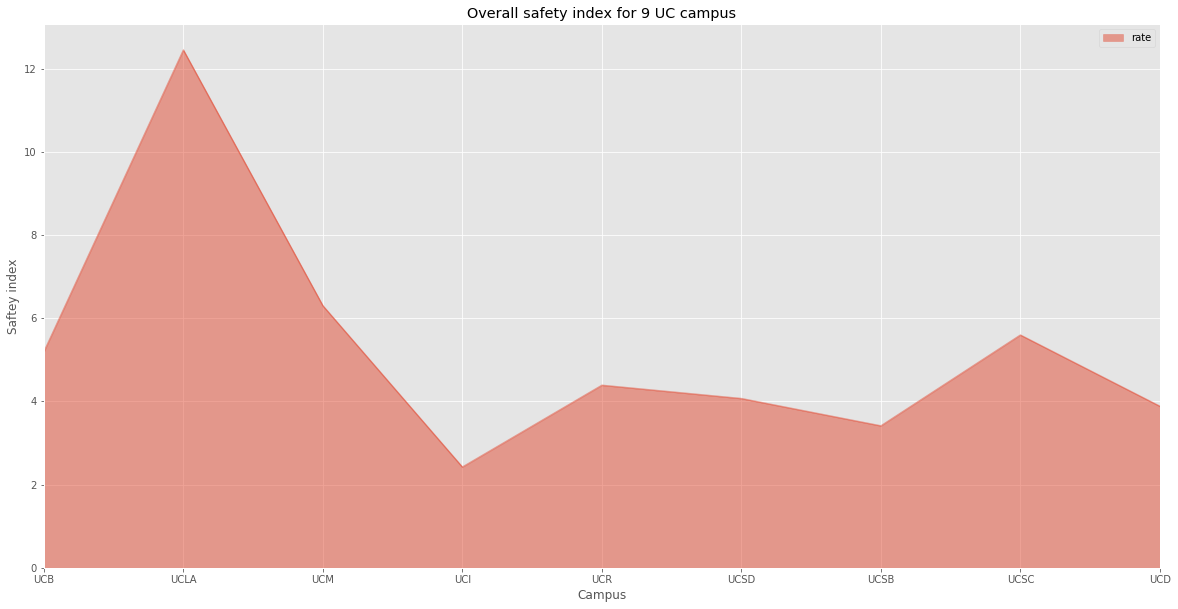

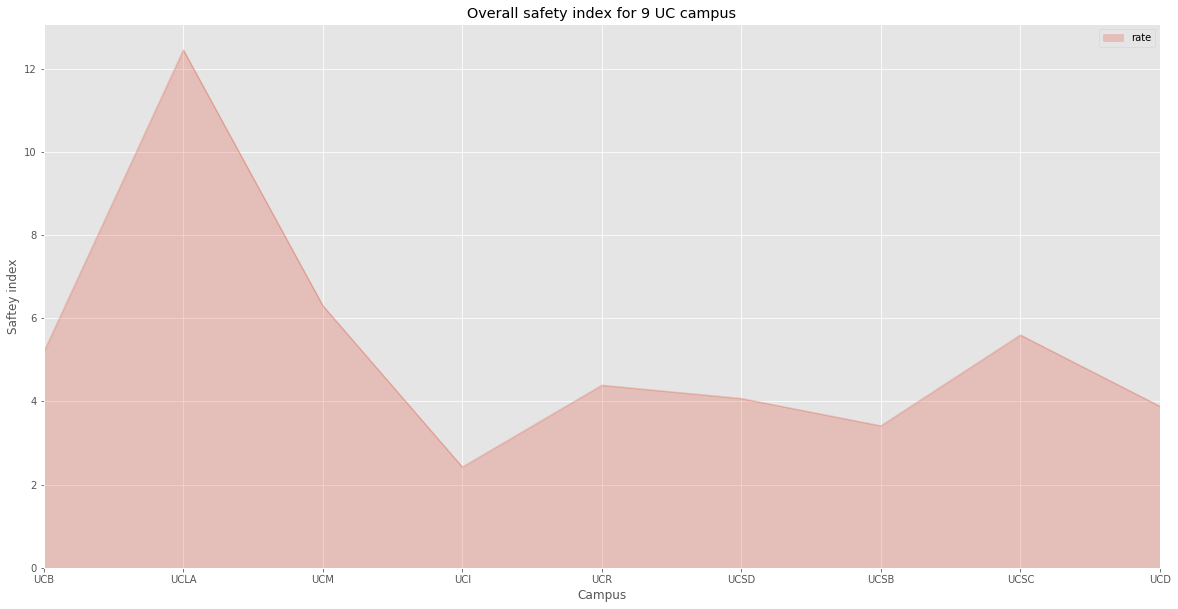

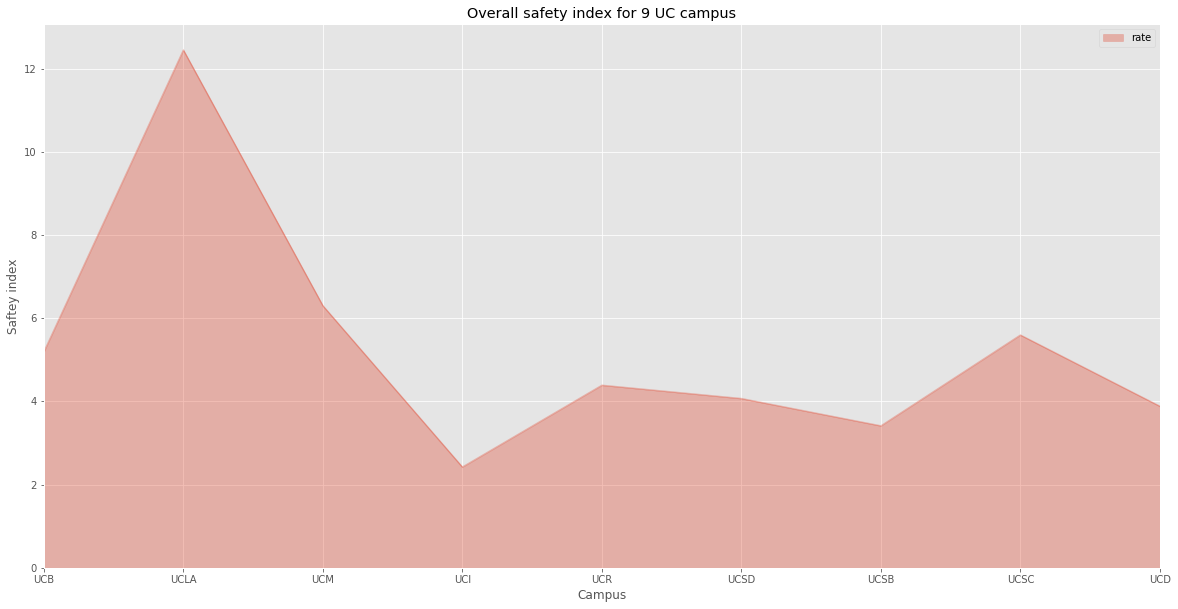

In [64]:
df_safety.plot(kind='area', stacked=False, figsize=(20, 10))
plt.title('Overall safety index for 9 UC campus')
plt.ylabel('Saftey index')
plt.xlabel('Campus')
plt.xticks([0,1,2,3,4,5,6,7,8],["UCB","UCLA","UCM","UCI","UCR","UCSD","UCSB","UCSC","UCD"])
plt.show()

df_safety.plot(kind='area', alpha=0.25, stacked=False, figsize=(20, 10))
plt.title('Overall safety index for 9 UC campus')
plt.ylabel('Saftey index')
plt.xlabel('Campus')
plt.xticks([0,1,2,3,4,5,6,7,8],["UCB","UCLA","UCM","UCI","UCR","UCSD","UCSB","UCSC","UCD"])
plt.show()

df_safety.plot(kind='area', alpha=0.35, figsize=(20, 10))
plt.title('Overall safety index for 9 UC campus')
plt.ylabel('Saftey index')
plt.xlabel('Campus')
plt.xticks([0,1,2,3,4,5,6,7,8],["UCB","UCLA","UCM","UCI","UCR","UCSD","UCSB","UCSC","UCD"])
plt.show()

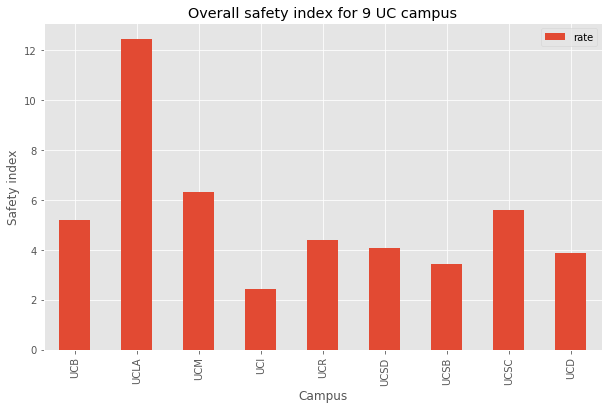

In [65]:
df_safety.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Campus') # add x-label to the plot
plt.ylabel('Safety index') # add y-label to the plot
plt.title('Overall safety index for 9 UC campus')
#print(df_safety)
plt.xticks([0,1,2,3,4,5,6,7,8],["UCB","UCLA","UCM","UCI","UCR","UCSD","UCSB","UCSC","UCD"])
plt.show()

# Conclusion:

# The campuses safety ranking are: 
1. UC Irving/Orange; [2]
2. UCSB [3]
3. UCR & UCSD, UCD [4]
4. UCB  [5]
5. UCSC, UCM [6]
6. UCLA [12]

# The most safety one is UC Irving and the most horrible are UCLA